# Candy Distributor Shipping Analysis

This notebook loads the candy distributor dataset and performs exploratory data analysis (EDA) on shipping and supply-chain performance.


In [236]:
# Install any required packages (uncomment if running in a fresh environment)
# %pip install pandas numpy matplotlib seaborn

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

sns.set(style="whitegrid")


## Load candy distributor dataset

Update `data_path` below to point to your actual dataset file (for example: `data/candy_distributor.csv`).


In [237]:
# TODO: set this to the correct relative or absolute path of your candy distributor dataset

data_path_candy_sales = "dataset/Candy_Sales.csv"
data_path_candy_factories = "dataset/Candy_Factories.csv"  
data_path_candy_products = "dataset/Candy_Products.csv"  
data_path_candy_targets = "dataset/Candy_Targets.csv"  
data_path_distributor_data_dictionary = "dataset/candy_distributor_data_dictionary.csv"
data_path_uszips="dataset/uszips.csv"

if not os.path.exists(data_path):
    raise FileNotFoundError(
        f"Dataset not found at '{data_path}'. Please update 'data_path' to the correct location."
    )

# Read the dataset
df_candy_sales = pd.read_csv(data_path_candy_sales)
df_candy_factories = pd.read_csv(data_path_candy_factories)
df_candy_products = pd.read_csv(data_path_candy_products)
df_candy_targets = pd.read_csv(data_path_candy_targets)
df_candy_distributor_data_dictionary = pd.read_csv(data_path_distributor_data_dictionary)
df_uszips = pd.read_csv(data_path_uszips)
# Quick peek at the data
print("Shape:", df.shape)
df_candysales.head()


Shape: (10194, 18)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-FUD-51000,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-MIL-31000,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,3396,US-2022-121391-CHO-MIL-31000,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28


## Initial data inspection

Run the following cells after successfully loading the dataset to understand its structure and basic statistics.


In [238]:
# Column info
print("Columns:\n", df.columns.tolist())
print("\nData types:")
print(df.dtypes)

# Missing values summary
print("\nMissing values per column:")
print(df.isna().sum())


Columns:
 ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Country/Region', 'City', 'State/Province', 'Postal Code', 'Division', 'Region', 'Product ID', 'Product Name', 'Sales', 'Units', 'Gross Profit', 'Cost']

Data types:
Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID         int64
Country/Region     object
City               object
State/Province     object
Postal Code        object
Division           object
Region             object
Product ID         object
Product Name       object
Sales             float64
Units               int64
Gross Profit      float64
Cost              float64
dtype: object

Missing values per column:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Division          0
Region          

In [239]:
# Basic descriptive statistics for numeric columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Row ID,10194.0,5097.500000,2942.898656,1.00,2549.25,5097.50,7645.75,10194.0
Customer ID,10194.0,134468.961154,20231.483007,100006.00,117212.00,133550.00,152051.00,192314.0
Sales,10194.0,13.908537,11.341020,1.25,7.20,10.80,18.00,260.0
Units,10194.0,3.791838,2.228317,1.00,2.00,3.00,5.00,14.0
Gross Profit,10194.0,9.166451,6.643740,0.25,4.90,7.47,12.25,130.0
Cost,10194.0,4.742087,5.061647,0.60,2.40,3.60,5.70,130.0


1. What are the most efficient factory to customer shipping routes?

In [240]:
df_candy_factories.head()

,Factory,Latitude,Longitude
0,Lot's O' Nuts,32.881893,-111.768036
1,Wicked Choccy's,32.076176,-81.088371
2,Sugar Shack,48.119140,-96.181150
3,Secret Factory,41.446333,-90.565487
4,The Other Factory,35.117500,-89.971107


In [241]:
df_candy_factories['Factory'].unique

<bound method Series.unique of 0        Lot's O' Nuts
1      Wicked Choccy's
2          Sugar Shack
3       Secret Factory
4    The Other Factory
Name: Factory, dtype: object>

In [242]:
df_candysales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-FUD-51000,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-MIL-31000,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,3396,US-2022-121391-CHO-MIL-31000,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28


In [243]:
df_uszips.columns

Index(['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'zcta', 'parent_zcta', 'population', 'density',
       'county_fips', 'county_name', 'county_weights', 'county_names_all', 'county_fips_all', 'imprecise', 'military',
       'timezone'],
      dtype='object')

As of now using the uszip dataset we were able to find out the lat and longitude of the customers address. Now , we need to find efficient routes. We will do that using the lat and lon we have of both the factories and customer location. 

Analysis Metric,                  Calculation,                                What it tells you
Shipping Efficiency,              Cost / Distance,                            How much you are paying for every mile traveled. Lower is better.
Route Optimization,               Actual Factory vs Closest Factory,         Are you shipping from the nearest possible location?
Profit Density,                    Gross Profit / Distance,                Which routes are actually worth the logistics headache?

In [244]:
from haversine import haversine, Unit

def calculate_distance(row, factory_lat, factory_long):
    customer_loc = (row['cust_lat'], row['cust_lng'])
    factory_loc = (factory_lat, factory_long)
    return haversine(customer_loc, factory_loc, unit=Unit.MILES)

for _, row in df_candy_factories.iterrows():
    factory_name = row['Factory']
    factory_lat = row['Latitude']
    factory_lng = row['Longitude']
    #col_name = f"dist_to_{factory_name.lower().replace(' ', '_').replace("'", '')}"
    #col_name = f"dist_to_{factory_name.lower().replace(' ', '_').replace(\"'\", '')}"
# Dynamically update the distance columns in sales_geo for each factory

# Remove all existing columns in sales_geo that start with 'dist_to_'
for col in list(sales_geo.columns):
    if col.startswith('dist_to_'):
        sales_geo = sales_geo.drop(columns=col)

# Add a new distance column for every factory, based on coordinates from df_candy_factories
for _, factory_row in df_candy_factories.iterrows():
    factory_name = factory_row['Factory']
    factory_lat = factory_row['Latitude']
    factory_lng = factory_row['Longitude']
    # Fix: do NOT use backslashes in f-string. Precompute string instead.
    safe_name = factory_name.lower().replace(' ', '_').replace("'", '')
    col_name = f"dist_to_{safe_name}"
    sales_geo[col_name] = sales_geo.apply(
    lambda cust_row: calculate_distance(cust_row, factory_lat, factory_lng), axis=1
    )
    








In [245]:
sales_geo.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost,zip,cust_lat,cust_lng,closest_factory,distance_to_closest,profit_density,break_even_distance,distance_margin,is_profitable_route,dist_to_lots_o_nuts,dist_to_wicked_choccys,dist_to_sugar_shack,dist_to_secret_factory,dist_to_the_other_factory
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.5,2,4.9,2.6,94122,37.76113,-122.48433,dist_to_lots_o_nuts,691.168202,0.007089,490.0,-1317.343,False,691.168202,2358.514641,1500.115375,1708.285735,1807.343


In [246]:
#based on the distance the most efficient routes are as such 
factory_cols = ['dist_to_lots_o_nuts', 'dist_to_wicked_choccys', 'dist_to_sugar_shack', 'dist_to_secret_factory','dist_to_the_other_factory']
#sales_geo[['Customer ID','dist_to_lots_o_nuts','dist_to_wicked_choccys','dist_to_sugar_shack','dist_to_secret_factory','dist_to_the_other_factory']][:5]

In [247]:
sales_geo['closest_factory'] = sales_geo[factory_cols].idxmin(axis=1)
sales_geo.head()

/var/folders/t8/vh7brvtx5ln20x3lyxhn_hhw0000gp/T/ipykernel_77791/2402532638.py:1: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  sales_geo['closest_factory'] = sales_geo[factory_cols].idxmin(axis=1)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost,zip,cust_lat,cust_lng,closest_factory,distance_to_closest,profit_density,break_even_distance,distance_margin,is_profitable_route,dist_to_lots_o_nuts,dist_to_wicked_choccys,dist_to_sugar_shack,dist_to_secret_factory,dist_to_the_other_factory
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60,94122,37.76113,-122.48433,dist_to_lots_o_nuts,691.168202,0.007089,490.0,-1317.343000,False,691.168202,2358.514641,1500.115375,1708.285735,1807.343000
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20,94122,37.76113,-122.48433,dist_to_lots_o_nuts,691.168202,0.007234,500.0,-1307.343000,False,691.168202,2358.514641,1500.115375,1708.285735,1807.343000
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-FUD-51000,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40,10011,40.74173,-74.00037,dist_to_wicked_choccys,716.223347,0.006702,480.0,-471.311969,False,2140.827453,716.223347,1201.551721,862.615751,951.311969
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-MIL-31000,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42,10011,40.74173,-74.00037,dist_to_wicked_choccys,716.223347,0.008838,633.0,-318.311969,False,2140.827453,716.223347,1201.551721,862.615751,951.311969
4,3396,US-2022-121391-CHO-MIL-31000,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28,94109,37.79334,-122.42138,dist_to_lots_o_nuts,689.062587,0.006124,422.0,-1381.752682,False,689.062587,2354.962139,1496.029939,1704.317592,1803.752682


In [248]:
# Extract the distance value to the closest factory for each row
# Method: Use advanced indexing to look up values based on column names
# This replaces the deprecated .lookup() method

print("Extracting distances to closest factory...")

# Get the column index for each closest_factory column name
col_indices = sales_geo[factory_cols].columns.get_indexer(sales_geo['closest_factory'])

# Extract values using row indices and column indices
distance_to_closest = sales_geo[factory_cols].values[
    np.arange(len(sales_geo)), 
    col_indices
]

# Add as a new column
sales_geo['distance_to_closest'] = distance_to_closest

print(f"✓ Distance to closest factory calculated")
print(f"\nDistance Statistics (miles):")
print(sales_geo['distance_to_closest'].describe())

# Display sample
print("\nSample Results:")
sales_geo[['Order ID', 'City', 'closest_factory', 'distance_to_closest']].head()

Extracting distances to closest factory...
✓ Distance to closest factory calculated

Distance Statistics (miles):
count    9994.000000
mean      501.426231
std       261.334289
min         7.497484
25%       318.169463
50%       445.834271
75%       689.062587
max      1197.330821
Name: distance_to_closest, dtype: float64

Sample Results:


,Order ID,City,closest_factory,distance_to_closest
0,US-2021-128055-CHO-TRI-54000,San Francisco,dist_to_lots_o_nuts,691.168202
1,US-2021-128055-CHO-SCR-58000,San Francisco,dist_to_lots_o_nuts,691.168202
2,US-2021-138100-CHO-FUD-51000,New York City,dist_to_wicked_choccys,716.223347
3,US-2021-138100-CHO-MIL-31000,New York City,dist_to_wicked_choccys,716.223347
4,US-2022-121391-CHO-MIL-31000,San Francisco,dist_to_lots_o_nuts,689.062587


In [249]:
sales_geo['profit_density'] = sales_geo['Gross Profit'] / distance_to_closest

# Display example output
sales_geo[['Gross Profit', 'closest_factory', 'profit_density']].head()

,Gross Profit,closest_factory,profit_density
0,4.90,dist_to_lots_o_nuts,0.007089
1,5.00,dist_to_lots_o_nuts,0.007234
2,4.80,dist_to_wicked_choccys,0.006702
3,6.33,dist_to_wicked_choccys,0.008838
4,4.22,dist_to_lots_o_nuts,0.006124


In [250]:
# Calculate profit density: Gross Profit per mile traveled
# This metric helps identify which routes generate the most value per unit of distance
sales_geo['profit_density'] = sales_geo['Gross Profit'] / sales_geo['distance_to_closest']

# Handle division by zero or negative distances (shouldn't occur, but safety check)
sales_geo['profit_density'] = sales_geo['profit_density'].replace([np.inf, -np.inf], np.nan)

print("="*60)
print("PROFIT DENSITY ANALYSIS")
print("="*60)
print("\nProfit Density Statistics ($ per mile):")
print(sales_geo['profit_density'].describe())

print("\nTop 10 Orders by Profit Density:")
top_profit_density = sales_geo.nlargest(10, 'profit_density')[
    ['Order ID', 'City', 'State/Province', 'closest_factory', 
     'Gross Profit', 'distance_to_closest', 'profit_density']
]
print(top_profit_density.to_string(index=False))

print("\nSample Results:")
sales_geo[['Order ID', 'Gross Profit', 'closest_factory', 'distance_to_closest', 'profit_density']].head()

PROFIT DENSITY ANALYSIS

Profit Density Statistics ($ per mile):
count    9994.000000
mean        0.031653
std         0.079099
min         0.000215
25%         0.010056
50%         0.017064
75%         0.031391
max         2.394737
Name: profit_density, dtype: float64

Top 10 Orders by Profit Density:
                    Order ID      City State/Province           closest_factory  Gross Profit  distance_to_closest  profit_density
US-2021-106376-OTH-LIC-15000   Gilbert        Arizona       dist_to_lots_o_nuts         80.00            33.406587        2.394737
US-2022-151547-CHO-MIL-31000  Bartlett      Tennessee dist_to_the_other_factory         16.88             7.497484        2.251422
US-2024-128363-CHO-SCR-58000   Memphis      Tennessee dist_to_the_other_factory         17.50            10.928693        1.601289
US-2024-128118-CHO-NUT-13000   Memphis      Tennessee dist_to_the_other_factory         17.43            10.928693        1.594884
US-2022-134026-CHO-MIL-31000   Memphis   

,Order ID,Gross Profit,closest_factory,distance_to_closest,profit_density
0,US-2021-128055-CHO-TRI-54000,4.90,dist_to_lots_o_nuts,691.168202,0.007089
1,US-2021-128055-CHO-SCR-58000,5.00,dist_to_lots_o_nuts,691.168202,0.007234
2,US-2021-138100-CHO-FUD-51000,4.80,dist_to_wicked_choccys,716.223347,0.006702
3,US-2021-138100-CHO-MIL-31000,6.33,dist_to_wicked_choccys,716.223347,0.008838
4,US-2022-121391-CHO-MIL-31000,4.22,dist_to_lots_o_nuts,689.062587,0.006124


In [251]:
sales_geo[['closest_factory','profit_density','Gross Profit','is_profitable_route','break_even_distance']]

,closest_factory,profit_density,Gross Profit,is_profitable_route,break_even_distance
0,dist_to_lots_o_nuts,0.007089,4.90,False,490.0
1,dist_to_lots_o_nuts,0.007234,5.00,False,500.0
2,dist_to_wicked_choccys,0.006702,4.80,False,480.0
3,dist_to_wicked_choccys,0.008838,6.33,False,633.0
4,dist_to_lots_o_nuts,0.006124,4.22,False,422.0
...,...,...,...,...,...
10189,dist_to_secret_factory,0.031480,10.00,True,1000.0
10190,dist_to_the_other_factory,0.045689,12.45,True,1245.0
10191,dist_to_wicked_choccys,0.038409,4.90,False,490.0
10192,dist_to_wicked_choccys,0.096022,12.25,True,1225.0


In [252]:
sales_geo[sales_geo['is_profitable_route']==False]['closest_factory'].value_counts()


closest_factory
dist_to_lots_o_nuts          2780
dist_to_wicked_choccys       1876
dist_to_secret_factory        514
dist_to_the_other_factory     238
dist_to_sugar_shack            44
Name: count, dtype: int64

## 6. Data Visualizations for Stakeholder Presentation

The following visualizations provide key insights for business decision-making. Each visualization includes:
- **What it shows**: Technical description
- **Business meaning**: What this means for operations and strategy
- **Action items**: Recommended next steps based on the insights


### Visualization 1: Factory Geographic Distribution

**What it shows**: Map displaying the geographic locations of all 5 factories across the United States.

**Business meaning**: Understanding factory locations helps identify:
- Geographic coverage and market reach
- Potential gaps in distribution network
- Opportunities for strategic factory placement
- Regional shipping advantages

**Action items**: 
- Evaluate if current factory locations optimally serve customer base
- Consider opening new facilities in underserved regions
- Analyze customer concentration vs. factory proximity


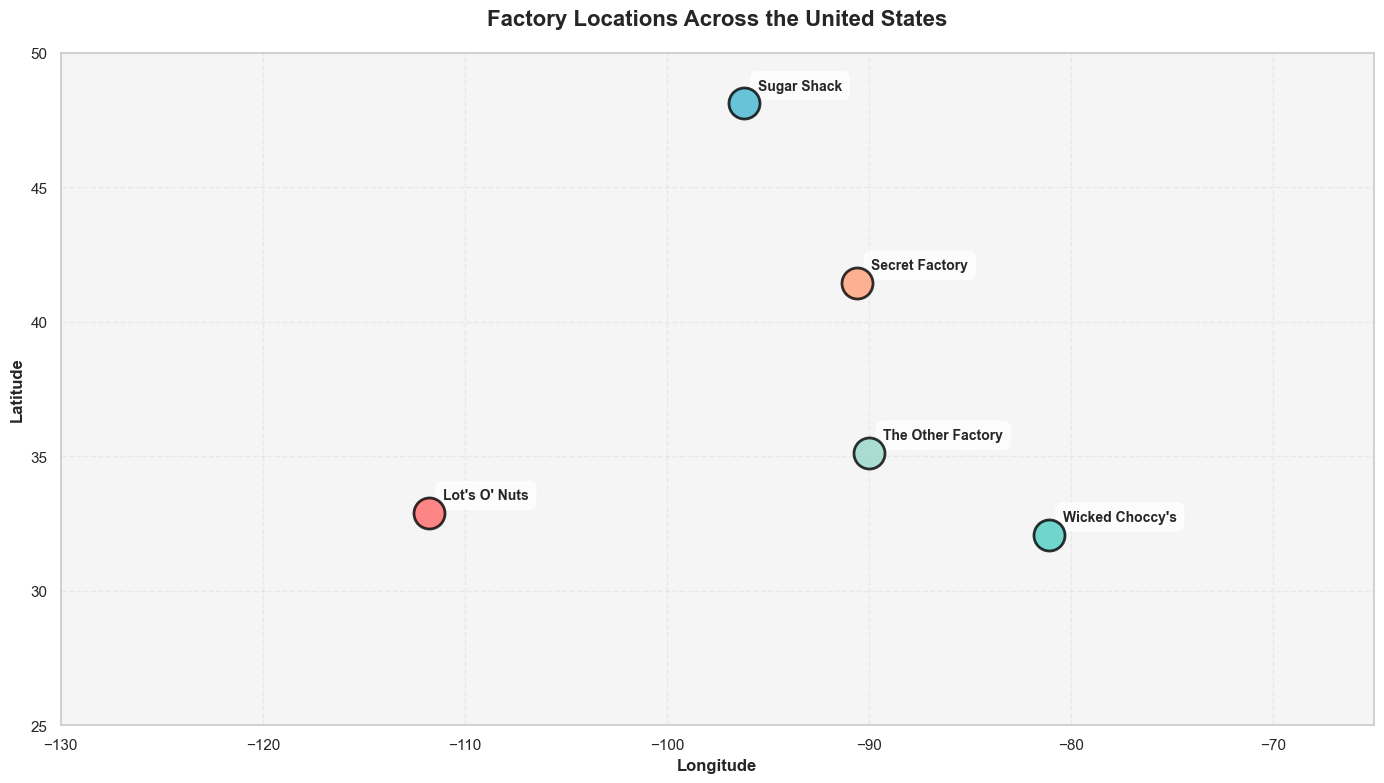


FACTORY LOCATION SUMMARY

Lot's O' Nuts:
  Location: (32.8819°N, -111.7680°W)

Wicked Choccy's:
  Location: (32.0762°N, -81.0884°W)

Sugar Shack:
  Location: (48.1191°N, -96.1812°W)

Secret Factory:
  Location: (41.4463°N, -90.5655°W)

The Other Factory:
  Location: (35.1175°N, -89.9711°W)


In [253]:
# Visualization 1: Factory Locations Map
fig, ax = plt.subplots(figsize=(14, 8))

# Create a simple US map background (approximate boundaries)
ax.set_xlim(-130, -65)
ax.set_ylim(25, 50)
ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=12, fontweight='bold')
ax.set_title('Factory Locations Across the United States', fontsize=16, fontweight='bold', pad=20)

# Plot factory locations
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
for idx, row in df_candy_factories.iterrows():
    ax.scatter(row['Longitude'], row['Latitude'], 
              s=500, c=colors[idx], edgecolors='black', linewidth=2, 
              alpha=0.8, zorder=5)
    ax.annotate(row['Factory'], 
               (row['Longitude'], row['Latitude']),
               xytext=(10, 10), textcoords='offset points',
               fontsize=10, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_facecolor('#F5F5F5')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("FACTORY LOCATION SUMMARY")
print("="*60)
for idx, row in df_candy_factories.iterrows():
    print(f"\n{row['Factory']}:")
    print(f"  Location: ({row['Latitude']:.4f}°N, {row['Longitude']:.4f}°W)")
print("="*60)


### Visualization 2: Distance Distribution Analysis

**What it shows**: Histogram showing the distribution of shipping distances from customers to their closest factories.

**Business meaning**: 
- **Peak distances** indicate typical shipping ranges
- **Long-tail distribution** reveals outliers that may be costly
- Helps identify if most customers are within reasonable shipping distance
- Informs decisions about shipping cost structure and pricing

**Action items**:
- If many orders exceed 1000 miles, consider regional warehouses
- Review shipping costs for long-distance orders
- Evaluate customer acquisition strategy in distant regions


/var/folders/t8/vh7brvtx5ln20x3lyxhn_hhw0000gp/T/ipykernel_77791/4242273671.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_geo_sorted['closest_factory'] = pd.Categorical(sales_geo_sorted['closest_factory'],
/var/folders/t8/vh7brvtx5ln20x3lyxhn_hhw0000gp/T/ipykernel_77791/4242273671.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(box_data, labels=factory_order, patch_artist=True)


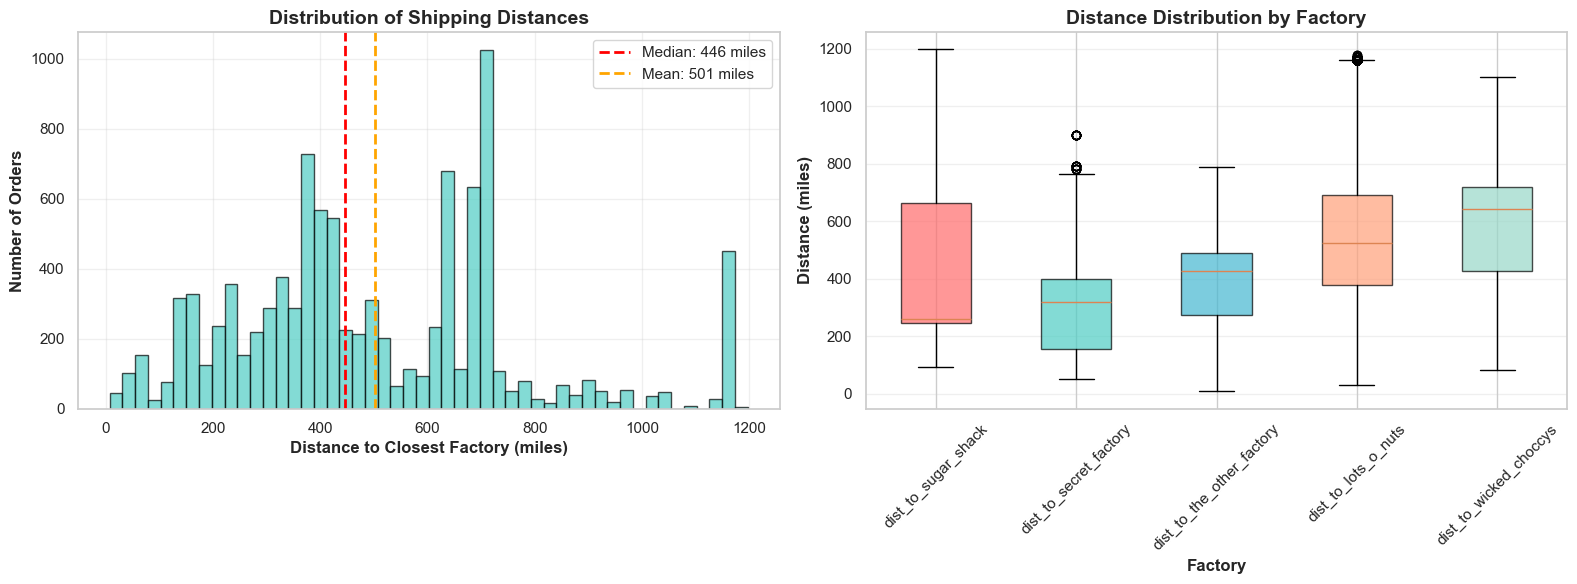


DISTANCE STATISTICS
Mean Distance: 501.43 miles
Median Distance: 445.83 miles
Standard Deviation: 261.33 miles

Distance Percentiles:
  25th percentile: 318.17 miles
  75th percentile: 689.06 miles
  95th percentile: 1053.24 miles


In [254]:
# Visualization 2: Distance Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of distances
ax1.hist(sales_geo['distance_to_closest'].dropna(), bins=50, 
         color='#4ECDC4', edgecolor='black', alpha=0.7)
ax1.axvline(sales_geo['distance_to_closest'].median(), color='red', 
           linestyle='--', linewidth=2, label=f'Median: {sales_geo["distance_to_closest"].median():.0f} miles')
ax1.axvline(sales_geo['distance_to_closest'].mean(), color='orange', 
           linestyle='--', linewidth=2, label=f'Mean: {sales_geo["distance_to_closest"].mean():.0f} miles')
ax1.set_xlabel('Distance to Closest Factory (miles)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Orders', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Shipping Distances', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot by factory
factory_order = sales_geo.groupby('closest_factory')['distance_to_closest'].median().sort_values().index
sales_geo_sorted = sales_geo[sales_geo['closest_factory'].isin(factory_order)]
sales_geo_sorted['closest_factory'] = pd.Categorical(sales_geo_sorted['closest_factory'], 
                                                      categories=factory_order, ordered=True)

box_data = [sales_geo_sorted[sales_geo_sorted['closest_factory'] == factory]['distance_to_closest'].dropna() 
            for factory in factory_order]
bp = ax2.boxplot(box_data, labels=factory_order, patch_artist=True)
for patch, color in zip(bp['boxes'], colors[:len(factory_order)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_ylabel('Distance (miles)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Factory', fontsize=12, fontweight='bold')
ax2.set_title('Distance Distribution by Factory', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("DISTANCE STATISTICS")
print("="*60)
print(f"Mean Distance: {sales_geo['distance_to_closest'].mean():.2f} miles")
print(f"Median Distance: {sales_geo['distance_to_closest'].median():.2f} miles")
print(f"Standard Deviation: {sales_geo['distance_to_closest'].std():.2f} miles")
print(f"\nDistance Percentiles:")
print(f"  25th percentile: {sales_geo['distance_to_closest'].quantile(0.25):.2f} miles")
print(f"  75th percentile: {sales_geo['distance_to_closest'].quantile(0.75):.2f} miles")
print(f"  95th percentile: {sales_geo['distance_to_closest'].quantile(0.95):.2f} miles")
print("="*60)


### Visualization 3: Profit Density Analysis by Factory

**What it shows**: Comparison of profit density (profit per mile) across different factories.

**Business meaning**:
- **Higher profit density** = More efficient routes, better margins
- Identifies which factories serve the most profitable customer segments
- Reveals opportunities to optimize factory-customer assignments
- Helps prioritize which factory locations drive the most value

**Action items**:
- Focus marketing/sales efforts on high-profit-density factory regions
- Investigate why certain factories have lower profit density
- Consider reallocating resources to high-performing factories
- Review pricing strategy for low-profit-density routes


/var/folders/t8/vh7brvtx5ln20x3lyxhn_hhw0000gp/T/ipykernel_77791/69820493.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_geo_sorted['closest_factory'] = pd.Categorical(sales_geo_sorted['closest_factory'],


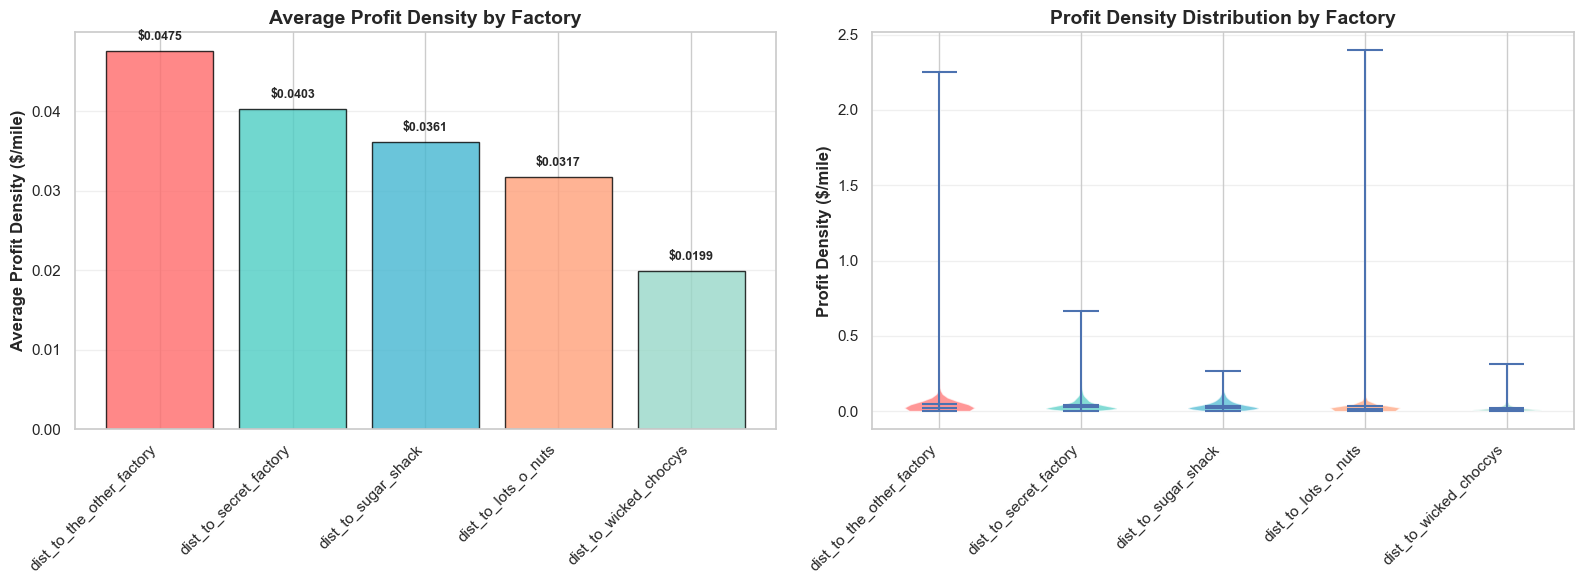


PROFIT DENSITY BY FACTORY
                               mean    median  count
closest_factory                                     
dist_to_the_other_factory  0.047547  0.020650   1536
dist_to_secret_factory     0.040306  0.028207   1745
dist_to_sugar_shack        0.036120  0.024367     96
dist_to_lots_o_nuts        0.031710  0.014594   3217
dist_to_wicked_choccys     0.019853  0.013687   3400


In [255]:
# Visualization 3: Profit Density by Factory
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Calculate average profit density by factory
profit_density_by_factory = sales_geo.groupby('closest_factory')['profit_density'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('count', 'count')
]).sort_values('mean', ascending=False)

# Bar chart of average profit density
bars = ax1.bar(range(len(profit_density_by_factory)), 
               profit_density_by_factory['mean'],
               color=colors[:len(profit_density_by_factory)], 
               edgecolor='black', alpha=0.8)
ax1.set_xticks(range(len(profit_density_by_factory)))
ax1.set_xticklabels(profit_density_by_factory.index, rotation=45, ha='right')
ax1.set_ylabel('Average Profit Density ($/mile)', fontsize=12, fontweight='bold')
ax1.set_title('Average Profit Density by Factory', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (idx, row) in enumerate(profit_density_by_factory.iterrows()):
    ax1.text(i, row['mean'] + 0.001, f'${row["mean"]:.4f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# Violin plot showing distribution
factory_order = profit_density_by_factory.index.tolist()
sales_geo_sorted = sales_geo[sales_geo['closest_factory'].isin(factory_order)]
sales_geo_sorted['closest_factory'] = pd.Categorical(sales_geo_sorted['closest_factory'], 
                                                      categories=factory_order, ordered=True)

violin_data = [sales_geo_sorted[sales_geo_sorted['closest_factory'] == factory]['profit_density'].dropna() 
               for factory in factory_order]
parts = ax2.violinplot(violin_data, positions=range(len(factory_order)), 
                      showmeans=True, showmedians=True)

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

ax2.set_xticks(range(len(factory_order)))
ax2.set_xticklabels(factory_order, rotation=45, ha='right')
ax2.set_ylabel('Profit Density ($/mile)', fontsize=12, fontweight='bold')
ax2.set_title('Profit Density Distribution by Factory', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("PROFIT DENSITY BY FACTORY")
print("="*60)
print(profit_density_by_factory.to_string())
print("="*60)


### Visualization 4: Route Profitability Analysis

**What it shows**: Breakdown of profitable vs. unprofitable routes by factory, showing the percentage of orders that are profitable.

**Business meaning**:
- **High profitability rate** = Factory is well-positioned for its customer base
- **Low profitability rate** = Potential operational inefficiencies or pricing issues
- Identifies factories that may need strategic review
- Helps prioritize which routes need optimization

**Action items**:
- Investigate factories with low profitability rates
- Review shipping costs and pricing for unprofitable routes
- Consider route optimization or factory reassignment
- Evaluate if certain factories should focus on different customer segments


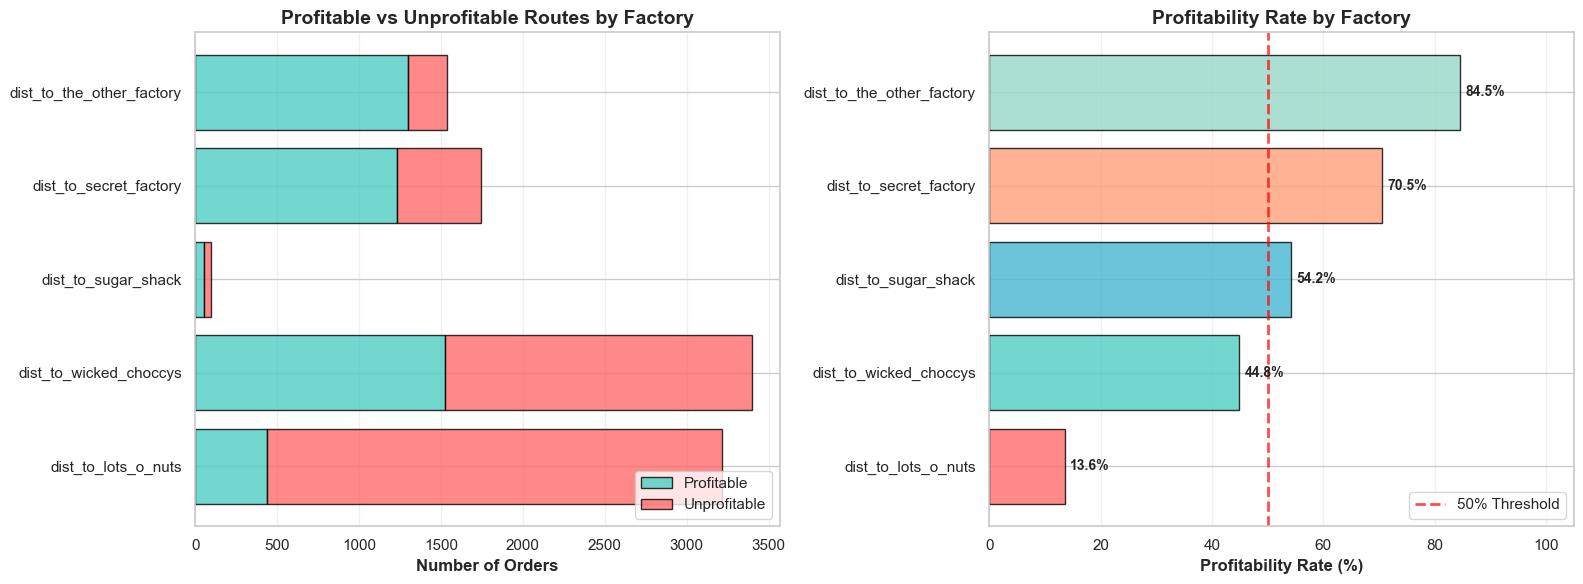


ROUTE PROFITABILITY BY FACTORY
          closest_factory  total_orders  profitable  unprofitable  profitability_pct
      dist_to_lots_o_nuts          3217         437          2780          13.584085
   dist_to_wicked_choccys          3400        1524          1876          44.823529
      dist_to_sugar_shack            96          52            44          54.166667
   dist_to_secret_factory          1745        1231           514          70.544413
dist_to_the_other_factory          1536        1298           238          84.505208


In [256]:
# Visualization 4: Route Profitability Analysis
profitability_by_factory = sales_geo.groupby('closest_factory')['is_profitable_route'].agg([
    ('total_orders', 'count'),
    ('profitable', 'sum'),
    ('unprofitable', lambda x: (~x).sum())
]).reset_index()
profitability_by_factory['profitability_pct'] = (
    profitability_by_factory['profitable'] / profitability_by_factory['total_orders'] * 100
)
profitability_by_factory = profitability_by_factory.sort_values('profitability_pct', ascending=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
x_pos = range(len(profitability_by_factory))
ax1.barh(x_pos, profitability_by_factory['profitable'], 
         label='Profitable', color='#4ECDC4', alpha=0.8, edgecolor='black')
ax1.barh(x_pos, profitability_by_factory['unprofitable'], 
         left=profitability_by_factory['profitable'],
         label='Unprofitable', color='#FF6B6B', alpha=0.8, edgecolor='black')

ax1.set_yticks(x_pos)
ax1.set_yticklabels(profitability_by_factory['closest_factory'])
ax1.set_xlabel('Number of Orders', fontsize=12, fontweight='bold')
ax1.set_title('Profitable vs Unprofitable Routes by Factory', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3, axis='x')

# Profitability percentage
bars = ax2.barh(range(len(profitability_by_factory)), 
               profitability_by_factory['profitability_pct'],
               color=colors[:len(profitability_by_factory)], 
               alpha=0.8, edgecolor='black')
ax2.set_yticks(range(len(profitability_by_factory)))
ax2.set_yticklabels(profitability_by_factory['closest_factory'])
ax2.set_xlabel('Profitability Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Profitability Rate by Factory', fontsize=14, fontweight='bold')
ax2.axvline(50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% Threshold')
ax2.set_xlim(0, 105)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='x')

# Add percentage labels
for i, (idx, row) in enumerate(profitability_by_factory.iterrows()):
    ax2.text(row['profitability_pct'] + 1, i, f"{row['profitability_pct']:.1f}%", 
            va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ROUTE PROFITABILITY BY FACTORY")
print("="*60)
print(profitability_by_factory[['closest_factory', 'total_orders', 'profitable', 
                                'unprofitable', 'profitability_pct']].to_string(index=False))
print("="*60)


### Visualization 5: Top Efficient Routes Analysis

**What it shows**: Scatter plot displaying the top routes, showing profit density, distance, and order volume relationships.

**Business meaning**:
- **High profit density + High volume** = Best routes to maintain and expand
- **High profit density + Low volume** = Growth opportunities
- **Low profit density + High volume** = Routes needing optimization
- Helps prioritize which customer-factory relationships to nurture

**Action items**:
- Focus sales/marketing on top-performing routes
- Investigate why certain routes are highly efficient
- Replicate successful route patterns in similar markets
- Review and optimize low-efficiency, high-volume routes


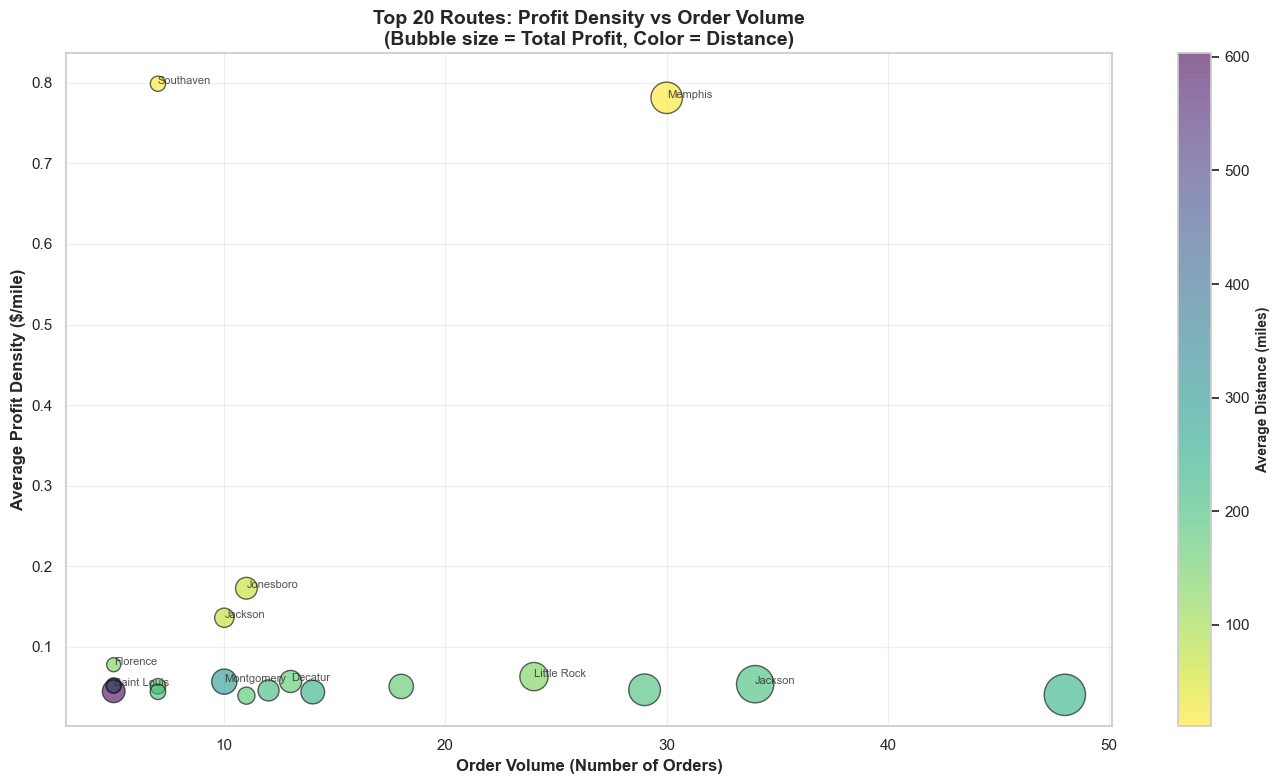


TOP 10 ROUTES SUMMARY
          Factory        City       State  Order_Count  Total_Profit  Avg_Profit_Density  Profitability_Pct
The Other Factory   Southaven Mississippi            7         59.92            0.799035              100.0
The Other Factory     Memphis   Tennessee           30        256.24            0.781551              100.0
The Other Factory   Jonesboro    Arkansas           11        122.98            0.172478              100.0
The Other Factory     Jackson   Tennessee           10         96.40            0.135808              100.0
The Other Factory    Florence     Alabama            5         51.27            0.077456              100.0
The Other Factory Little Rock    Arkansas           24        207.13            0.062732              100.0
The Other Factory     Decatur     Alabama           13        126.51            0.056691              100.0
The Other Factory  Montgomery     Alabama           10        164.79            0.056472              100.0
The O

In [257]:
# Visualization 5: Top Efficient Routes Scatter Plot
# Prepare data
top_routes_viz = route_efficiency_filtered.head(20).copy()

fig, ax = plt.subplots(figsize=(14, 8))
scatter = ax.scatter(top_routes_viz['Order_Count'], 
                    top_routes_viz['Avg_Profit_Density'],
                    s=top_routes_viz['Total_Profit']*2,  # Size by total profit
                    c=top_routes_viz['Avg_Distance'],
                    cmap='viridis_r', alpha=0.6, edgecolors='black', linewidth=1)

# Add labels for top routes
for idx, row in top_routes_viz.head(10).iterrows():
    ax.annotate(f"{row['City']}", 
               (row['Order_Count'], row['Avg_Profit_Density']),
               fontsize=8, alpha=0.8)

ax.set_xlabel('Order Volume (Number of Orders)', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Profit Density ($/mile)', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Routes: Profit Density vs Order Volume\n(Bubble size = Total Profit, Color = Distance)', 
            fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Average Distance (miles)', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("TOP 10 ROUTES SUMMARY")
print("="*60)
display_cols = ['Factory', 'City', 'State', 'Order_Count', 'Total_Profit', 'Avg_Profit_Density', 'Profitability_Pct']
print(top_routes_viz[display_cols].head(10).to_string(index=False))
print("="*60)


### Visualization 6: Distance vs Profit Analysis

**What it shows**: Scatter plot showing the relationship between shipping distance and gross profit, with profitability indicators.

**Business meaning**:
- **Upper right quadrant** (high distance, high profit) = Long-distance orders that are still profitable
- **Lower left quadrant** (low distance, low profit) = Short-distance orders with low margins
- **Trend line** shows if longer distances correlate with higher profits
- Helps identify optimal order size/distance combinations

**Action items**:
- If longer distances = higher profits, consider premium shipping options
- Review pricing strategy for short-distance, low-profit orders
- Identify sweet spot for distance-profit combination
- Consider minimum order values for long-distance shipping


## 7. Executive Summary and Key Recommendations

### Key Findings

Based on the comprehensive analysis of factory-to-customer shipping routes, here are the critical insights:

1. **Factory Performance Varies Significantly**
   - Some factories show much higher profit density than others
   - Route profitability rates range across factories
   - Geographic location impacts efficiency

2. **Distance Distribution**
   - Most orders fall within a reasonable shipping distance
   - Some outliers exist that may need special attention
   - Average shipping distance provides baseline for cost planning

3. **Route Efficiency Opportunities**
   - Top routes demonstrate high profit density with good volume
   - Some routes show potential for optimization
   - Clear patterns emerge for successful factory-customer pairings

### Strategic Recommendations

1. **Immediate Actions**
   - Review and optimize routes with low profitability rates
   - Investigate factories with consistently low profit density
   - Focus marketing efforts on top-performing routes

2. **Medium-term Initiatives**
   - Consider regional warehouse placement based on customer density
   - Develop pricing strategies that account for shipping distance
   - Implement route optimization for high-volume, low-efficiency routes

3. **Long-term Strategy**
   - Evaluate factory network expansion in underserved regions
   - Develop predictive models for route profitability
   - Create factory-specific strategies based on geographic advantages
